# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Juan Jose Bustamante Guiral
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

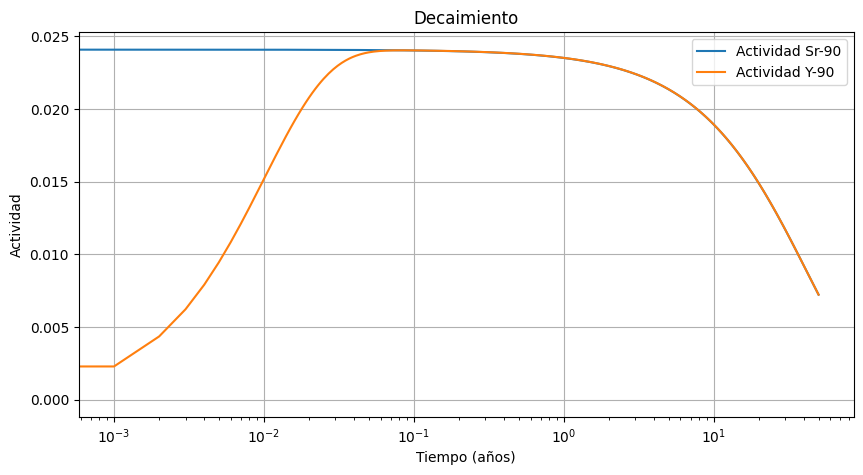

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos iniciales
t_med_Sr = 28.78    # vida media Sr en años
t_med_Y = 2.67/365  # vida media Y en años (convertimos días a años)
N0_Sr = 1.0         # cantidad inicial de Sr (relativa)
N0_Y = 0.0          # cantidad inicial de Y


lambda_Sr = np.log(2) / t_med_Sr
lambda_Y = np.log(2) / t_med_Y

# método de Euler
dt = 0.001
t_max = 50
n_pasos = int(t_max / dt)

tiempo = np.zeros(n_pasos)
N_Sr = np.zeros(n_pasos)
N_Y = np.zeros(n_pasos)

# Condiciones iniciales
N_Sr[0] = N0_Sr
N_Y[0] = N0_Y

# Método de Euler
for i in range(1, n_pasos):
    dN_Sr = -lambda_Sr * N_Sr[i-1]
    dN_Y = -lambda_Y * N_Y[i-1] - dN_Sr

    N_Sr[i] = N_Sr[i-1] + dN_Sr * dt
    N_Y[i] = N_Y[i-1] + dN_Y * dt
    tiempo[i] = tiempo[i-1] + dt

A_Sr = lambda_Sr * N_Sr
A_Y = lambda_Y * N_Y

plt.figure(figsize=(10,5))
plt.plot(tiempo, A_Sr, label='Actividad Sr-90')
plt.plot(tiempo, A_Y, label='Actividad Y-90')
plt.xscale('log')
plt.xlabel('Tiempo (años)')
plt.ylabel('Actividad')
plt.title('Decaimiento')
plt.legend()
plt.grid()
plt.show()


# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

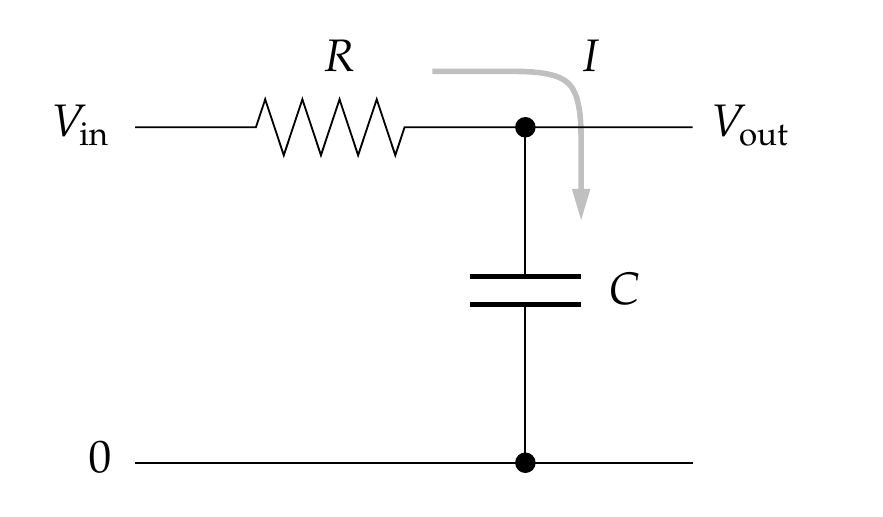

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

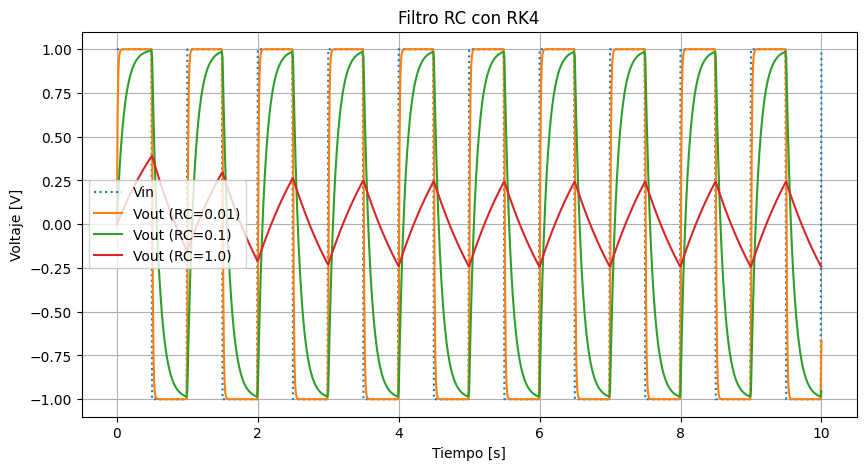

In [4]:
import matplotlib.pyplot as plt

def vin(t):
    if (t % 1.0) < 0.5:   # primera mitad del ciclo
        return 1.0
    else:                 # segunda mitad del ciclo
        return -1.0


def dVdt(t, V, tau):
    return (vin(t) - V) / tau


t0 = 0.0
tf = 10.0
dt = 0.01
n_pasos = int((tf - t0) / dt)

times = [t0 + i*dt for i in range(n_pasos + 1)]
taus = [0.01, 0.1, 1.0]
V0 = 0.0

# RK4
plt.figure(figsize=(10,5))
plt.plot(times, [vin(t) for t in times], linestyle=':', label='Vin')

for tau in taus:
    V = [V0]
    for i in range(n_pasos):
        t = times[i]
        y = V[-1]

        k1 = dVdt(t,           y,             tau)
        k2 = dVdt(t + dt/2.0,  y + dt*k1/2.0,  tau)
        k3 = dVdt(t + dt/2.0,  y + dt*k2/2.0,  tau)
        k4 = dVdt(t + dt,      y + dt*k3,      tau)

        y_next = y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        V.append(y_next)

    plt.plot(times, V, label=f'Vout (RC={tau})')

plt.title('Filtro RC con RK4')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.grid()
plt.legend()
plt.show()


# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

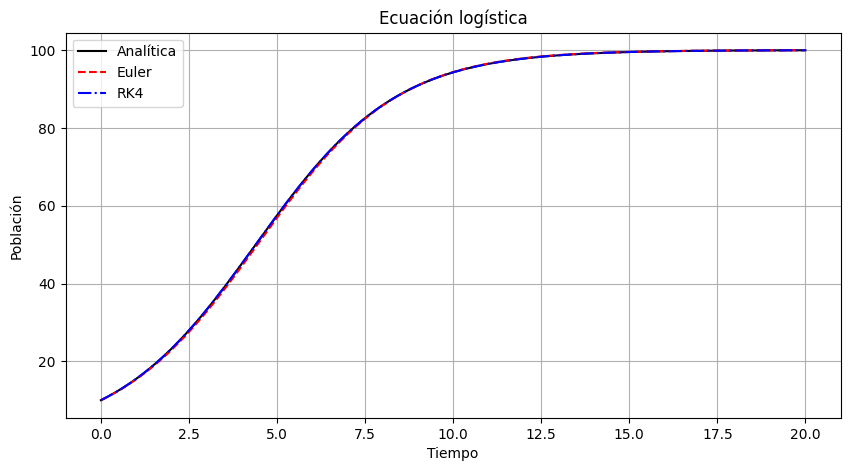

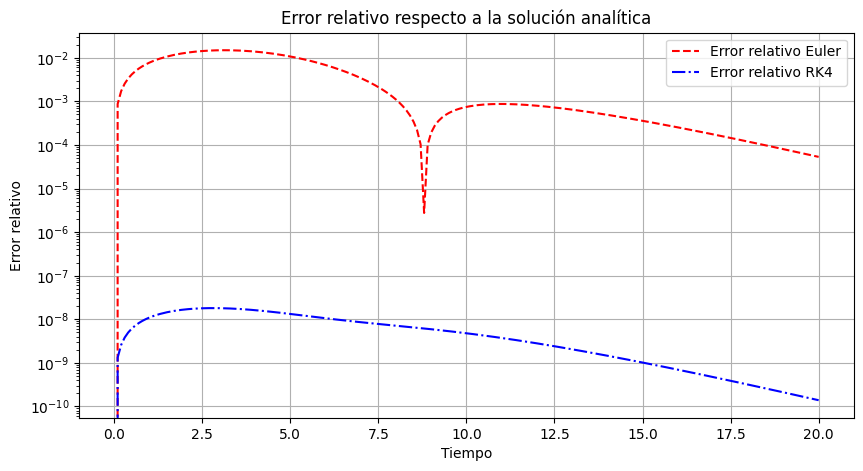

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def my_logistic_eq(t, P, r, K):
    '''
    Ecuacuion ligisticA
    '''
    return r * P * (1 - P / K)


P0 = 10     # población inicial
r = 0.5     # tasa de crecimiento
K = 100     # capacidad de carga
t0 = 0      # tiempo inicial
tf = 20     # tiempo final
dt = 0.1    # paso de integración


t_values = np.arange(t0, tf + dt, dt)


def logistic_analitica(t, P0, r, K):
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))

P_analytical = logistic_analitica(t_values, P0, r, K)

P_euler = [P0]
for i in range(1, len(t_values)):
    P_prev = P_euler[-1]
    dP = my_logistic_eq(t_values[i-1], P_prev, r, K)
    P_next = P_prev + dP * dt
    P_euler.append(P_next)

P_euler = np.array(P_euler)


P_rk4 = [P0]
for i in range(1, len(t_values)):
    P_prev = P_rk4[-1]
    t_prev = t_values[i-1]

    k1 = my_logistic_eq(t_prev, P_prev, r, K)
    k2 = my_logistic_eq(t_prev + dt/2, P_prev + dt*k1/2, r, K)
    k3 = my_logistic_eq(t_prev + dt/2, P_prev + dt*k2/2, r, K)
    k4 = my_logistic_eq(t_prev + dt, P_prev + dt*k3, r, K)

    P_next = P_prev + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    P_rk4.append(P_next)

P_rk4 = np.array(P_rk4)

error_euler = np.abs((P_analytical - P_euler) / P_analytical)
error_rk4 = np.abs((P_analytical - P_rk4) / P_analytical)

plt.figure(figsize=(10,5))
plt.plot(t_values, P_analytical, 'k-', label="Analítica")
plt.plot(t_values, P_euler, 'r--', label="Euler")
plt.plot(t_values, P_rk4, 'b-.', label="RK4")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Ecuación logística')
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# 8. Graficar errores
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(t_values, error_euler, 'r--', label="Error relativo Euler")
plt.plot(t_values, error_rk4, 'b-.', label="Error relativo RK4")
plt.yscale("log")  # escala logarítmica para ver bien el error
plt.xlabel("Tiempo")
plt.ylabel("Error relativo")
plt.title("Error relativo respecto a la solución analítica")
plt.legend()
plt.grid(True)
plt.show()


# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

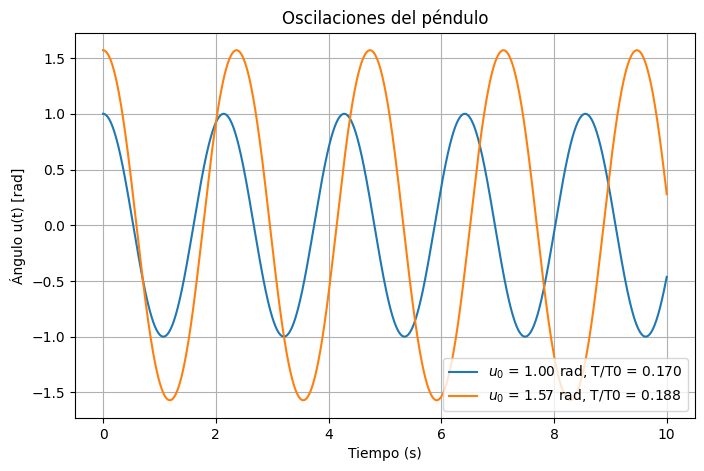

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import sin, sqrt, pi

# Parámetros
g = 9.81
l = 1.0
h = 0.001

# RK4
def rk4(u, w, h):
    def f1(u, w): return w
    def f2(u, w): return -(g/l)*sin(u)

    k1u = h * f1(u, w)
    k1w = h * f2(u, w)

    k2u = h * f1(u + k1u/2, w + k1w/2)
    k2w = h * f2(u + k1u/2, w + k1w/2)

    k3u = h * f1(u + k2u/2, w + k2w/2)
    k3w = h * f2(u + k2u/2, w + k2w/2)

    k4u = h * f1(u + k3u, w + k3w)
    k4w = h * f2(u + k3u, w + k3w)

    u_new = u + (k1u + 2*k2u + 2*k3u + k4u)/6
    w_new = w + (k1w + 2*k2w + 2*k3w + k4w)/6

    return u_new, w_new

# Función para calcular período numérico
def simular(u0, t_max=10):
    u, w = u0, 0.0
    t = 0.0
    ts, us = [], []
    while t < t_max:
        ts.append(t)
        us.append(u)
        u, w = rk4(u, w, h)
        t += h
    return np.array(ts), np.array(us)

# Función para calcular período analítico
def periodo_analitico(u0):
    alpha = sin(u0/2)**2
    integrando = lambda z: 1.0 / sqrt((1 - z**2)*(1 - alpha*z**2))
    K, _ = quad(integrando, 0, 1)
    return sqrt(l/g) * (2/pi) * K

# Valores iniciales
u0_list = [1.0, pi/2]
T0 = 2*pi*sqrt(l/g)

plt.figure(figsize=(8,5))

for u0 in u0_list:
    t, u_t = simular(u0, t_max=10)
    Tn = periodo_analitico(u0)
    plt.plot(t, u_t, label=f"$u_0$ = {u0:.2f} rad, T/T0 = {Tn/T0:.3f}")

plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo u(t) [rad]')
plt.title('Oscilaciones del péndulo')
plt.legend()
plt.grid()
plt.show()


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

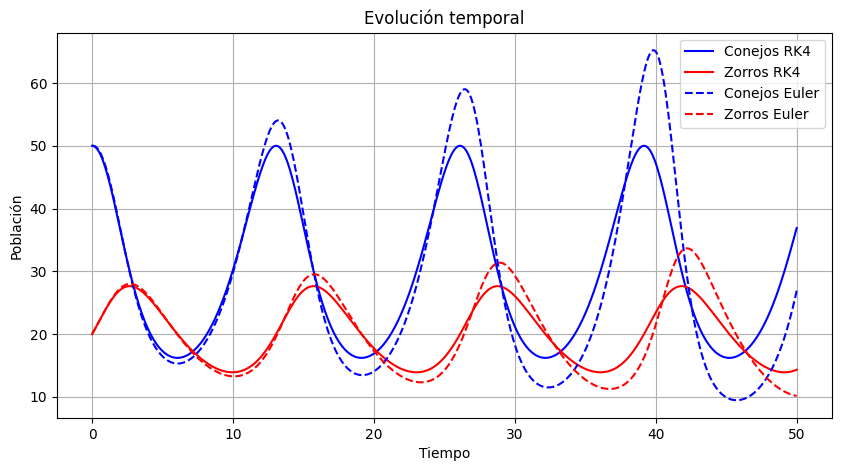

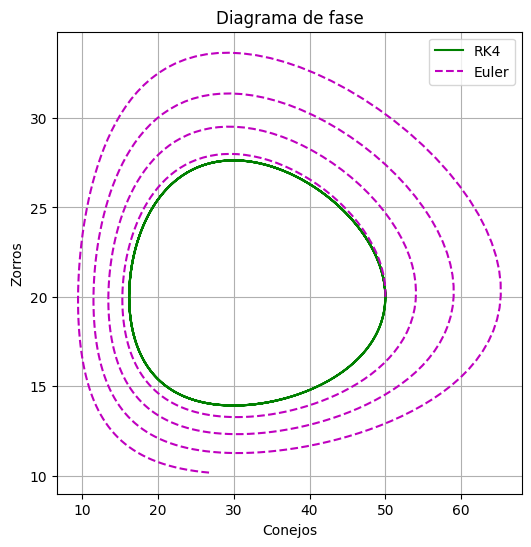

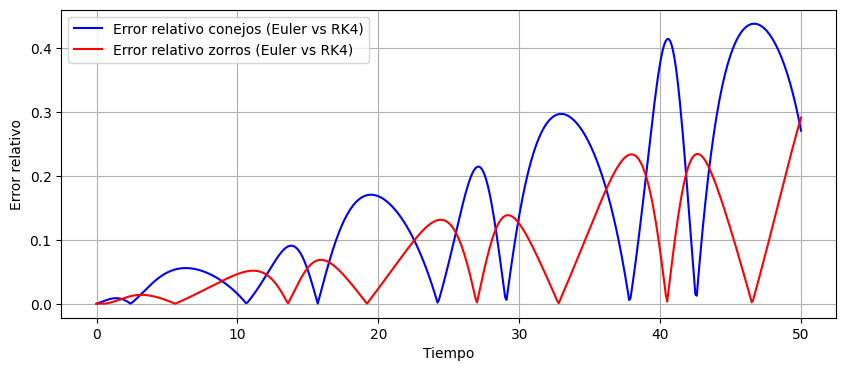

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

# Condiciones iniciales
x0 = 50
y0 = 20
t_max = 50
h = 0.1

# sistema de ecuaciones
def modelo(x, y):
    dx = alpha*x - beta*x*y
    dy = -gamma*y + delta*x*y
    return dx, dy

# Euler
def euler(h):
    pasos = int(t_max/h) + 1
    t = np.linspace(0, t_max, pasos)
    x = np.zeros(pasos)
    y = np.zeros(pasos)
    x[0], y[0] = x0, y0

    for i in range(pasos-1):
        dx, dy = modelo(x[i], y[i])
        x[i+1] = x[i] + h*dx
        y[i+1] = y[i] + h*dy

    return t, x, y

# RK2
def rk2(h):
    pasos = int(t_max/h) + 1
    t = np.linspace(0, t_max, pasos)
    x = np.zeros(pasos)
    y = np.zeros(pasos)
    x[0], y[0] = x0, y0

    for i in range(pasos-1):
        dx1, dy1 = modelo(x[i], y[i])
        dx2, dy2 = modelo(x[i] + h*dx1/2, y[i] + h*dy1/2)
        x[i+1] = x[i] + h*dx2
        y[i+1] = y[i] + h*dy2

    return t, x, y

# RK4
def rk4(h):
    pasos = int(t_max/h) + 1
    t = np.linspace(0, t_max, pasos)
    x = np.zeros(pasos)
    y = np.zeros(pasos)
    x[0], y[0] = x0, y0

    for i in range(pasos-1):
        dx1, dy1 = modelo(x[i], y[i])
        dx2, dy2 = modelo(x[i] + h*dx1/2, y[i] + h*dy1/2)
        dx3, dy3 = modelo(x[i] + h*dx2/2, y[i] + h*dy2/2)
        dx4, dy4 = modelo(x[i] + h*dx3, y[i] + h*dy3)

        x[i+1] = x[i] + (h/6)*(dx1 + 2*dx2 + 2*dx3 + dx4)
        y[i+1] = y[i] + (h/6)*(dy1 + 2*dy2 + 2*dy3 + dy4)

    return t, x, y

t_e, x_e, y_e = euler(h)
t_rk2, x_rk2, y_rk2 = rk2(h)
t_rk4, x_rk4, y_rk4 = rk4(h)

# Cálculo de error relativo
error_x = np.abs((x_e - x_rk4) / x_rk4)
error_y = np.abs((y_e - y_rk4) / y_rk4)

# Gráficas de evolución temporal
plt.figure(figsize=(10,5))
plt.plot(t_rk4, x_rk4, 'b-', label='Conejos RK4')
plt.plot(t_rk4, y_rk4, 'r-', label='Zorros RK4')
plt.plot(t_e, x_e, 'b--', label='Conejos Euler')
plt.plot(t_e, y_e, 'r--', label='Zorros Euler')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Evolución temporal')
plt.legend()
plt.grid(True)
plt.show()

# Diagrama de fase
plt.figure(figsize=(6,6))
plt.plot(x_rk4, y_rk4, 'g-', label='RK4')
plt.plot(x_e, y_e, 'm--', label='Euler')
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.title("Diagrama de fase")
plt.legend()
plt.grid(True)
plt.show()

# Error relativo
plt.figure(figsize=(10,4))
plt.plot(t_e, error_x, 'b-', label='Error relativo conejos (Euler vs RK4)')
plt.plot(t_e, error_y, 'r-', label='Error relativo zorros (Euler vs RK4)')
plt.xlabel("Tiempo")
plt.ylabel("Error relativo")
plt.legend()
plt.grid(True)
plt.show()


# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


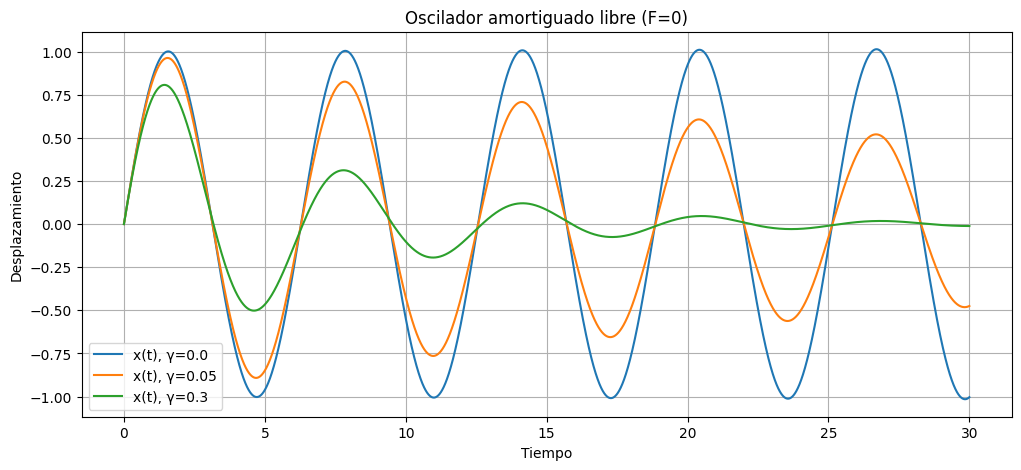

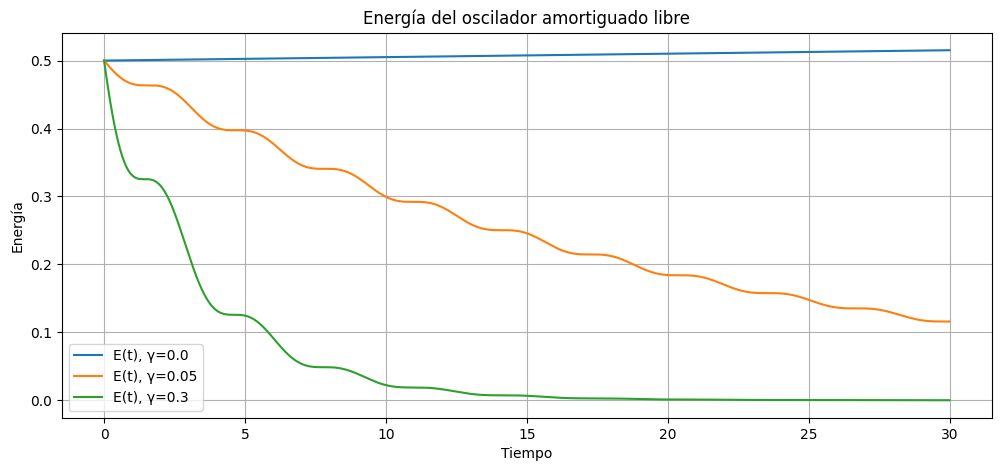

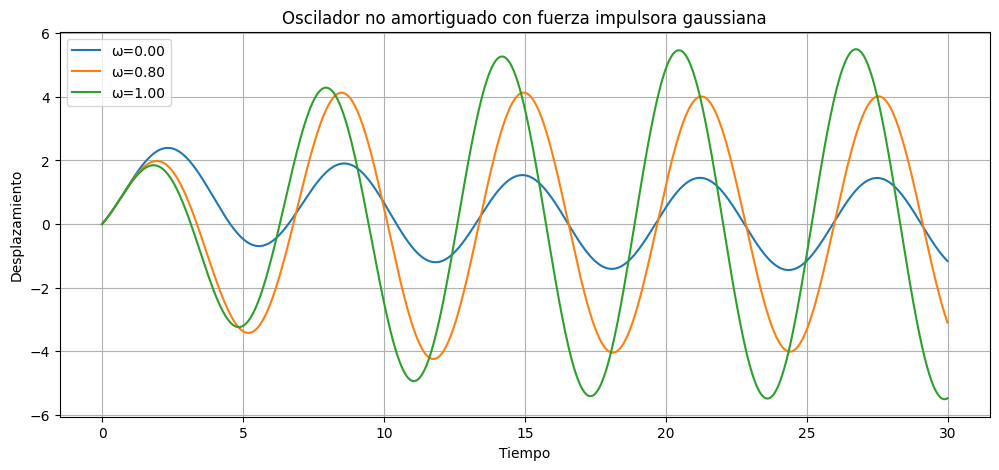

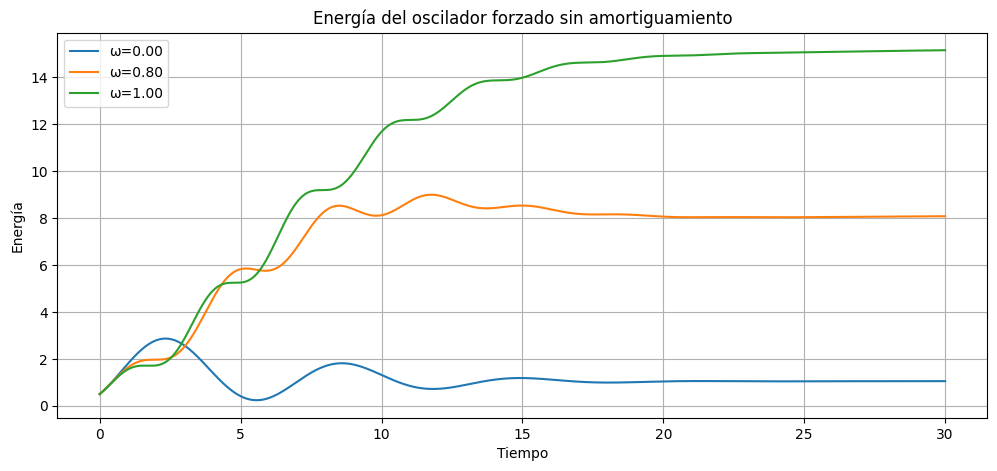

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
m = 1.0       # masa
k = 1.0       # constante elástica
w0 = np.sqrt(k/m)  # frecuencia angular natural
t_max = 30
dt = 0.001
t = np.arange(0, t_max, dt)

# Ecuaciones del oscilador:
def osc_forzado_amortiguado(gamma, F_func):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = 0.0
    v[0] = 1.0
    for i in range(len(t)-1):
        F = F_func(t[i])
        a = (-gamma*v[i] - w0**2 * x[i] + F/m)
        v[i+1] = v[i] + a*dt
        x[i+1] = x[i] + v[i]*dt
    return x, v

# Energía
def energia(x, v):
    return 0.5*m*v**2 + 0.5*k*x**2


gammas = [0.0, 0.05, 0.3]
plt.figure(figsize=(12,5))
for gamma in gammas:
    x, v = osc_forzado_amortiguado(gamma, lambda t: 0.0)
    E = energia(x, v)
    plt.plot(t, x, label=f'x(t), γ={gamma}')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Oscilador amortiguado libre (F=0)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
for gamma in gammas:
    x, v = osc_forzado_amortiguado(gamma, lambda t: 0.0)
    E = energia(x, v)
    plt.plot(t, E, label=f'E(t), γ={gamma}')
plt.xlabel('Tiempo')
plt.ylabel('Energía')
plt.title('Energía del oscilador amortiguado libre')
plt.legend()
plt.grid()
plt.show()


F0 = 1.0
T = 10
omegas = [0, 0.8*w0, w0]
plt.figure(figsize=(12,5))
for omega in omegas:
    F_func = lambda tt: F0*np.cos(omega*tt)*np.exp(-tt**2/T**2)
    x, v = osc_forzado_amortiguado(0.0, F_func)
    plt.plot(t, x, label=f'ω={omega:.2f}')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.title('Oscilador no amortiguado con fuerza impulsora gaussiana')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
for omega in omegas:
    F_func = lambda tt: F0*np.cos(omega*tt)*np.exp(-tt**2/T**2)
    x, v = osc_forzado_amortiguado(0.0, F_func)
    E = energia(x, v)
    plt.plot(t, E, label=f'ω={omega:.2f}')
plt.xlabel('Tiempo')
plt.ylabel('Energía')
plt.title('Energía del oscilador forzado sin amortiguamiento')
plt.legend()
plt.grid()
plt.show()


# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

<>:73: SyntaxWarning: invalid escape sequence '\m'
<>:73: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1852043145.py:73: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Estabilidad lineal: partes reales de autovalores vs $\mu$')


3.003e-06 Sol–Tierra
0.0009537 Sol–Júpiter


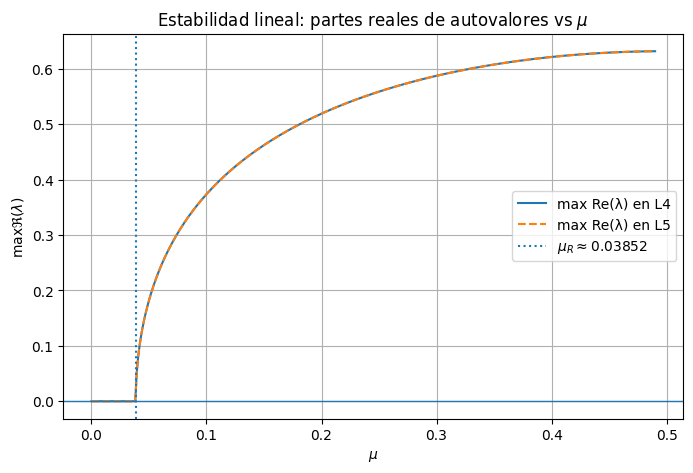

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig


def second_derivatives(mu: float, which: str = "L4"):
    """
    Devuelve a=Ω_xx, b=Ω_xy, c=Ω_yy evaluados en L4 o L5.
    Coordenadas (adimensionales):
        L4: x = 1/2 - mu, y = +sqrt(3)/2
        L5: x = 1/2 - mu, y = -sqrt(3)/2
    Con r1=r2=1 en ambos puntos triangulares.
    """
    y = np.sqrt(3)/2
    if which.upper() == "L5":
        y = -y

    # En L4/L5: r1=r2=1, x+mu=+1/2, x-1+mu=-1/2
    a = 3.0/4.0                      # Ω_xx
    c = 9.0/4.0                      # Ω_yy
    b_mag = (3*np.sqrt(3)/4.0) * (1 - 2*mu)  # Ω_xy (proporcional a y)
    b = np.sign(y) * np.abs(b_mag)   # cambia de signo entre L4 y L5
    return a, b, c


def A_matriz(mu: float, which: str = "L4"):
    a, b, c = second_derivatives(mu, which)
    A = np.array([[0, 1, 0, 0],
                  [a, 0, b, 2],
                  [0, 0, 0, 1],
                  [b,-2, c, 0]], dtype=float)
    return A

def estabilidad(mu: float, which: str = "L4"):
    A = A_matriz(mu, which)
    eigvals = eig(A)[0]
    estable = np.all(np.real(eigvals) == 0) or np.all(np.abs(np.real(eigvals)) < 1e-10)
    return eigvals, estable


def casos(mu, name):
    mu_R = 0.0385208965  # umbral de Routh
    for which in ('L4', 'L5'):
        eigvals, _ = estabilidad(mu, which)
        print(f'\nCaso {name} – {which}:  μ = {mu:.8f}')
        for j, lam in enumerate(eigvals, 1):
            print(f' λ{j} = {lam:.6f}')
        max_real = np.max(np.real(eigvals))
        print(f'Máx(Re(λ)) = {max_real:.3e}  => ' +
              ('Estable (lineal)' if max_real < 1e-12 else 'Inestable'))
    print(f'\nCriterio de Routh: μ < μ_R ≈ {mu_R:.8f}'
          + ('Cumple' if mu < mu_R else 'No cumple'))

def mu_y_plot():
    mus = np.linspace(1e-5, 0.49, 400)
    max_real_L4 = []
    max_real_L5 = []
    for mu in mus:
        e4, _ = estabilidad(mu, "L4")
        e5, _ = estabilidad(mu, "L5")
        max_real_L4.append(np.max(np.real(e4)))
        max_real_L5.append(np.max(np.real(e5)))

    mu_R = 0.0385208965

    plt.figure(figsize=(8,5))
    plt.plot(mus, max_real_L4, label='max Re(λ) en L4')
    plt.plot(mus, max_real_L5, '--', label='max Re(λ) en L5')
    plt.axhline(0, linewidth=1)
    plt.axvline(mu_R, linestyle=':', label=r'$\mu_R\approx 0.03852$')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\max \Re(\lambda)$')
    plt.title('Estabilidad lineal: partes reales de autovalores vs $\mu$')
    plt.grid()
    plt.legend()
    plt.show()


mu_sun_earth   = 3.003e-6      # ≈ m_Tierra /(m_Sol + m_Tierra)
mu_sun_jupiter = 0.0009537     # ≈ m_Júpiter/(m_Sol + m_Júpiter)

print(mu_sun_earth, "Sol–Tierra")
print(mu_sun_jupiter, "Sol–Júpiter")

mu_y_plot()


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


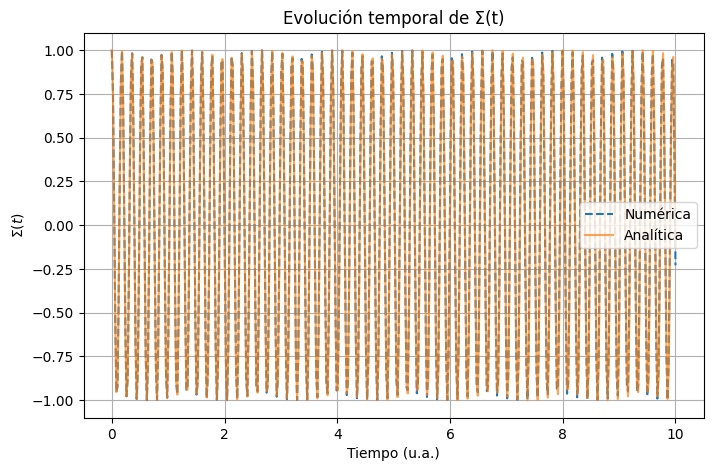

Matriz del sistema A:
[[ 0.00e+00  1.00e+00]
 [-1.25e+03  0.00e+00]]

Valores propios del sistema:
[0.+35.35533906j 0.-35.35533906j]
El sistema es marginalmente estable (oscilaciones sinusoidales).


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import eig

# Parámetros
V0 = 200.0  # km/s
r = 8.0     # kpc
Omega = V0 / r
kappa = np.sqrt(2) * Omega

# Condiciones iniciales
Sigma0 = 1.0
Sigma_dot0 = 0.0

# Tiempo de simulación
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Ecuaciones de primer orden
def sistema(t, y, kappa):
    Sigma, Sigma_dot = y
    dSigma_dt = Sigma_dot
    dSigma_dot_dt = - (kappa**2) * Sigma
    return [dSigma_dt, dSigma_dot_dt]

# Solución numérica
sol = solve_ivp(sistema, t_span, [Sigma0, Sigma_dot0], args=(kappa,), t_eval=t_eval)

# Solución analítica
Sigma_analitica = Sigma0 * np.cos(kappa * t_eval) + (Sigma_dot0 / kappa) * np.sin(kappa * t_eval)

# valores propios de la matriz
A = np.array([[0, 1], [-kappa**2, 0]])
valores_propios, vectores = eig(A)

# Graficar comparación
plt.figure(figsize=(8, 5))
plt.plot(t_eval, sol.y[0], label='Numérica', linestyle='--')
plt.plot(t_eval, Sigma_analitica, label='Analítica', alpha=0.7)
plt.xlabel('Tiempo (u.a.)')
plt.ylabel(r'$\Sigma(t)$')
plt.title('Evolución temporal de Σ(t)')
plt.legend()
plt.grid()
plt.show()


# Imprimir resultados
print('Matriz del sistema A:')
print(A)
print('\nValores propios del sistema:')
print(valores_propios)

if np.all(np.real(valores_propios) == 0):
    print('El sistema es marginalmente estable (oscilaciones sinusoidales).')
elif np.any(np.real(valores_propios) > 0):
    print('El sistema es inestable (crece exponencialmente)')
else:
    print('El sistema es estable (decadencia exponencial).')


# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

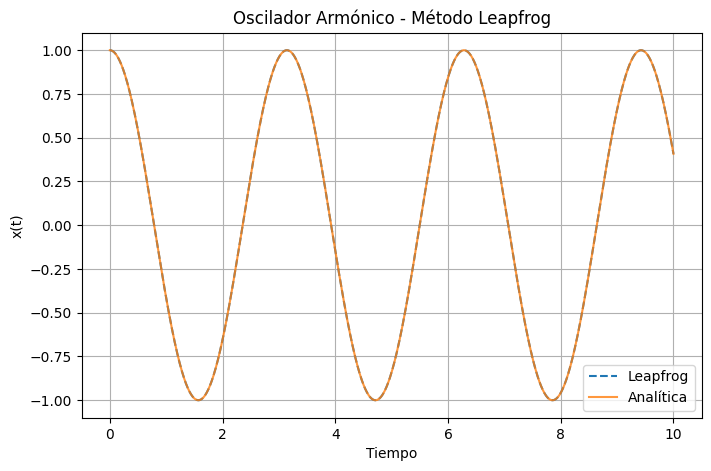

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
omega = 2.0       # rad/s
dt = 0.01         # paso de tiempo
t_max = 10.0      # tiempo máximo
n_steps = int(t_max / dt)

# Condiciones iniciales
x0 = 1.0          # posición inicial
v0 = 0.0          # velocidad inicial

# Función f(x) = -omega^2 * x
def f(x):
    return -omega**2 * x

# Vectores
t = np.linspace(0, t_max, n_steps + 1)
x = np.zeros(n_steps + 1)
v = np.zeros(n_steps + 1)

# Asignar condiciones iniciales
x[0] = x0
v[0] = v0

# Paso inicial de velocidad a medio paso
v_half = v0 + 0.5 * f(x0) * dt

# Método Leapfrog
for n in range(n_steps):
    x[n+1] = x[n] + v_half * dt
    v_half = v_half + f(x[n+1]) * dt
    v[n+1] = v_half - 0.5 * f(x[n+1]) * dt

# Solución analítica
x_analitica = x0 * np.cos(omega * t) + (v0 / omega) * np.sin(omega * t)

plt.figure(figsize=(8,5))
plt.plot(t, x, label='Leapfrog', linestyle='--')
plt.plot(t, x_analitica, label='Analítica', alpha=0.8)
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Oscilador Armónico - Método Leapfrog')
plt.legend()
plt.grid()
plt.show()
